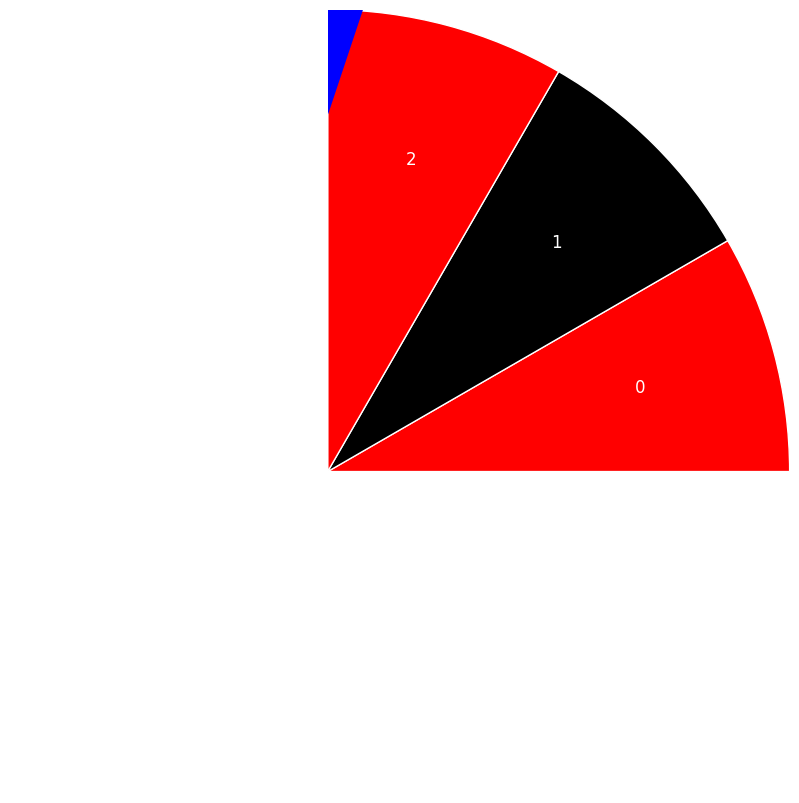

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import matplotlib.transforms as transforms

# Konfigurasi jumlah segmen dan warna (contoh: 12 segmen dengan warna bergantian)
num_segments = 12
theta = np.linspace(0, 2*np.pi, num_segments+1)
colors = ['red', 'black'] * (num_segments // 2)
if num_segments % 2 == 1:
    colors.append('red')

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.axis('off')  # non-aktifkan sumbu

# Gambar segmen-segmen roda
wedges = []
for i in range(num_segments):
    wedge = patches.Wedge(center=(0, 0),
                          r=1,
                          theta1=np.degrees(theta[i]),
                          theta2=np.degrees(theta[i+1]),
                          facecolor=colors[i],
                          edgecolor='white')
    ax.add_patch(wedge)
    wedges.append(wedge)

# Tambahkan label angka pada tiap segmen
for i in range(num_segments):
    angle = (theta[i] + theta[i+1]) / 2
    x = 0.7 * np.cos(angle)
    y = 0.7 * np.sin(angle)
    ax.text(x, y, str(i), ha='center', va='center', fontsize=12, color='white')

# Tambahkan indikator panah di atas roda
arrow = patches.FancyArrow(0, 1.2, 0, -0.2, width=0.05, color='blue')
ax.add_patch(arrow)

# Fungsi update untuk animasi: memutar roda
def update(frame):
    # Buat transformasi rotasi berdasarkan frame saat ini
    rotation = transforms.Affine2D().rotate_deg(frame) + ax.transData
    # Terapkan rotasi ke setiap segmen
    for wedge in wedges:
        wedge.set_transform(rotation)
    # Terapkan rotasi juga pada label teks agar tetap menyatu dengan segmen
    for text in ax.texts:
        text.set_transform(rotation)
    return wedges + ax.texts

# Buat animasi dengan memutar roda dari 0 hingga 360 derajat
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=True)

plt.show()

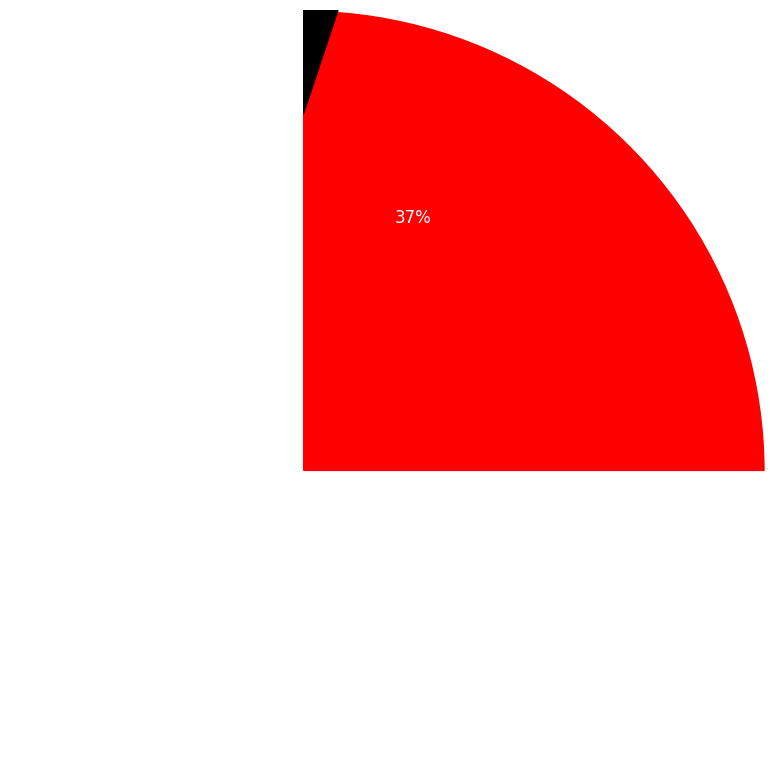

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import matplotlib.transforms as transforms

# Data persentase untuk masing-masing segmen
data = [37, 30, 12, 21]

# Konversi persentase menjadi sudut (dalam derajat)
angles = [d / 100 * 360 for d in data]

# Hitung sudut awal untuk tiap segmen
theta_start = np.cumsum([0] + angles[:-1])
theta_end = theta_start + angles

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.axis('off')  # non-aktifkan sumbu

# Pilih warna untuk tiap segmen
colors = ['red', 'green', 'blue', 'orange']

# Gambar setiap segmen dengan ukuran yang sudah dihitung
wedges = []
for i in range(len(data)):
    wedge = patches.Wedge(center=(0, 0),
                          r=1,
                          theta1=theta_start[i],
                          theta2=theta_end[i],
                          facecolor=colors[i],
                          edgecolor='white')
    ax.add_patch(wedge)
    wedges.append(wedge)

# Tambahkan label persentase pada tiap segmen di tengah-tengah segmen
for i in range(len(data)):
    angle = np.deg2rad((theta_start[i] + theta_end[i]) / 2)
    x = 0.6 * np.cos(angle)
    y = 0.6 * np.sin(angle)
    ax.text(x, y, f"{data[i]}%", ha='center', va='center', fontsize=12, color='white')

# Tambahkan indikator panah di atas roda untuk menunjukkan pemenang
arrow = patches.FancyArrow(0, 1.2, 0, -0.2, width=0.05, color='black')
ax.add_patch(arrow)

# Fungsi update untuk animasi: memutar roda
def update(frame):
    # Buat transformasi rotasi berdasarkan frame saat ini
    rotation = transforms.Affine2D().rotate_deg(frame) + ax.transData
    # Terapkan transformasi pada setiap segmen
    for wedge in wedges:
        wedge.set_transform(rotation)
    # Terapkan transformasi pada label agar tetap seirama dengan segmen
    for text in ax.texts:
        # Pastikan teks yang merupakan label persentase ikut berputar
        text.set_transform(rotation)
    return wedges + ax.texts

# Buat animasi: roda akan berputar dari 0 hingga 360 derajat
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=True)

plt.show()

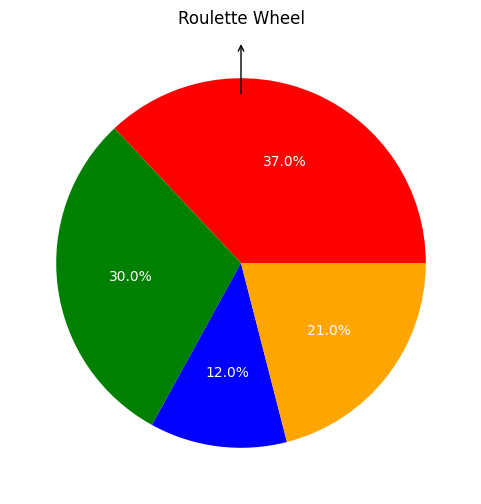

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Data persentase dan warna masing-masing segmen
data = [37, 30, 12, 21]
colors = ['red', 'green', 'blue', 'orange']

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')  # pastikan roda berbentuk lingkaran

def update(frame):
    ax.clear()  # hapus gambar sebelumnya
    ax.set_aspect('equal')
    ax.set_title("Roulette Wheel")

    # Gambar pie chart dengan parameter 'startangle' yang berubah (untuk animasi rotasi)
    wedges, texts, autotexts = ax.pie(
        data,
        colors=colors,
        startangle=frame,  # mengubah rotasi sesuai frame
        autopct='%1.1f%%',
        textprops={'color':"w"}
    )

    # Tambahkan indikator panah di bagian atas roda
    ax.annotate('', xy=(0, 1.2), xytext=(0, 0.9),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    return wedges + texts + autotexts

# Buat animasi: roda akan berputar dari 0 hingga 360 derajat
ani = animation.FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50, blit=True)

plt.show()

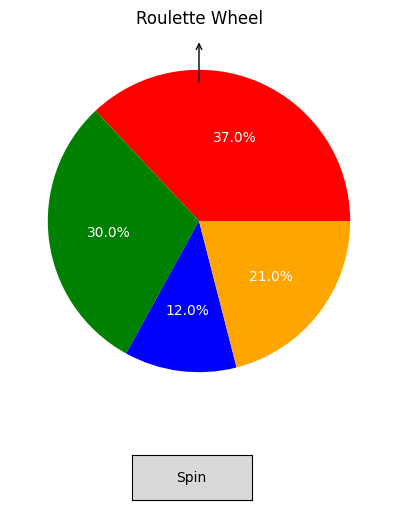

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Button

# Data persentase dan warna tiap segmen
data = [37, 30, 12, 21]
colors = ['red', 'green', 'blue', 'orange']

fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(bottom=0.25)  # sisakan ruang untuk tombol
ax.set_aspect('equal')

# Fungsi untuk menggambar ulang pie chart dengan rotasi tertentu
def update(frame):
    ax.clear()
    ax.set_aspect('equal')
    ax.set_title("Roulette Wheel")

    # Gambar pie chart dengan rotasi 'frame'
    wedges, texts, autotexts = ax.pie(
        data,
        colors=colors,
        startangle=frame,
        autopct='%1.1f%%',
        textprops={'color': 'white'}
    )

    # Tambahkan indikator panah (tetap di posisi atas)
    ax.annotate('', xy=(0, 1.2), xytext=(0, 0.9),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    return wedges + texts + autotexts

# Inisialisasi gambar awal
update(0)

# Fungsi untuk menentukan pemenang berdasarkan sudut akhir
def get_winner(final_angle):
    # final_angle adalah total rotasi (dalam derajat) yang diterapkan pada roda
    # Panah berada pada posisi 90° (atas). Karena roda telah berotasi,
    # sudut relatif terhadap roda adalah:
    rel_angle = (90 - (final_angle % 360)) % 360
    # Hitung batas-batas sudut tiap segmen berdasarkan data
    cum_angles = np.cumsum([0] + [d/100*360 for d in data])
    for i in range(len(data)):
        if cum_angles[i] <= rel_angle < cum_angles[i+1]:
            return i  # indeks segmen (0-indexed)
    return None

# Fungsi spin dipanggil ketika tombol diklik
def spin(event):
    # Sembunyikan tombol agar tidak terganggu selama animasi
    spin_button.ax.set_visible(False)
    fig.canvas.draw_idle()

    # Tentukan total rotasi secara acak (misal antara 720° dan 1080°)
    final_angle = np.random.uniform(720, 1080)
    n_frames = 120
    # Buat deret waktu t antara 0 dan 1 untuk keperluan easing
    t = np.linspace(0, 1, n_frames)
    # Easing quadratic ease-out: hasil = 1 - (1-t)^2
    eased = 1 - (1 - t)**2
    frames = final_angle * eased

    # Buat animasi dengan deret frame tersebut
    ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

    # Timer untuk menangani akhir animasi
    total_duration = n_frames * 50  # interval (ms) * jumlah frame
    timer = fig.canvas.new_timer(interval=total_duration)

    def on_anim_end():
        winner = get_winner(final_angle)
        # Tampilkan hasil pemenang di bawah roda
        ax.text(0, -1.3, f"Winner: Segment {winner+1}", ha='center',
                fontsize=16, color='black', bbox=dict(facecolor='white', alpha=0.8))
        fig.canvas.draw_idle()
        # Tampilkan kembali tombol spin
        spin_button.ax.set_visible(True)
        fig.canvas.draw_idle()

    timer.add_callback(on_anim_end)
    timer.start()

# Buat tombol "Spin"
ax_button = plt.axes([0.4, 0.1, 0.2, 0.075])
spin_button = Button(ax_button, 'Spin')
spin_button.on_clicked(spin)

plt.show()